In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
# IMPORTUOTI DARBO PRADZIOJE
# nuosavų funkcijų importavimas:
from manoFunkcijos import *

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px


In [6]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()
# IMPORTUOTI DARBO PRADZIOJE

In [4]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [5]:
pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [ ]:
#axis.ticklabel_format(style='plain')   

In [ ]:
txt = '3.25,4.25,7.11,10'
s = np.fromstring(txt, sep=',')
print(s)

In [61]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, amzius, group_concat(bdu_spalio) from DUS2018N
group by lytis, amzius;
"""
C.execute(sql)
ans = C.fetchall()
lytis, amzius, bduspal = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 10
| 0 |       F        |     14-29      |400,511,915,975,|
| 1 |       F        |     30-39      |400,440,1061,178|
| 2 |       F        |     40-49      |460,400,400,407,|
| 3 |       F        |     50-59      |400,216,505,770,|
| 4 |       F        |      60+       |225,663,516,530,|


In [62]:
print(bdusp)  # <- cia sarasas tekstu 
print(type(bdusp))


['6,6,6,13.33,10,6,9,17,31.67,6,6,6,6,6.67,29,9.67,10,11.33,72,30.67,23.33,30.67,173,122.67,17,128.33,1605,56.67,72,92,11.33,205,102,62.33,33,1041,87,1063,129,121,79,1208,736,626.67,105,54,146.67,133,115.67,118,173,159,172.67,67.67,111,692,640.33,222.33,309,25.33,287.67,145.67,630,284,208.33,231,296,1159.67,1286,301.33,144,113.33,294,259,260,180,258,118,439.33,156.33,1153,191.67,259,305,260,1395,1041,297,397.33,90,203,400,206.67,488,537,99,1075.33,100,311,1180,231,242.33,281.67,288.33,1418,288.33,259,305.33,518,299,288,850,300.33,259,265,1073,1139,130,230,350,265,518,23.33,434,571,433.33,288,525,524.67,491.33,633,1063,318,1160,343,258,398.33,1131,1344,1027.33,835,517,695.33,598,521,491.33,434,326,259,259,1349,550,265,140,55,535,100,1231,1061.33,387,300,305.33,345,103,351,1154,343,1136,1196,73,277,1287,254.67,613,394,669,724,250,531,557,577,1155,938.67,406.33,621,378.67,1035,1841.67,1118,1894,360,414.33,413,432,253.33,1184,1601,1183,1251,367,317,576,1153,1342,417.33,543,525.33,1066,340,

In [63]:
# numpy fromstring


for i in bdusp:                           # Ciklas per kiekvieną elementą sąraše 'bdusp'
    skaiciai = np.fromstring(i, sep=',')  # Konvertuoja tekstinį kintamąjį 'i' į NumPy masyvą, prielaidą darant, kad 'i' yra atskirtas kableliais
    bduspII.append(skaiciai)              # Prideda konvertuotą masyvą į sąrašą 'bduspII'
print(bduspII)                            # Atspausdina galutinį sąrašą 'bduspII', kuriame yra visi NumPy masyvai


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [11]:
txt = '3.25,4.25,7.11'             # Sukuriamas tekstas, kuriame yra trys skaičiai atskirti kableliais
s = np.fromstring(txt, sep=',')    # Nuskaitomas tekstas ir konvertuojamas į NumPy masyvą, kur skaičiai atskiriami kableliais
print(s)                           # Atspausdinamas NumPy masyvas 's', kuriame yra trys plūdantieji skaičiai (float)
type(s)                            # Grąžinamas ir atspausdinamas kintamojo 's' duomenų tipas (klasė), kuris turėtų būti 'numpy.ndarray'


[3.25 4.25 7.11]


numpy.ndarray

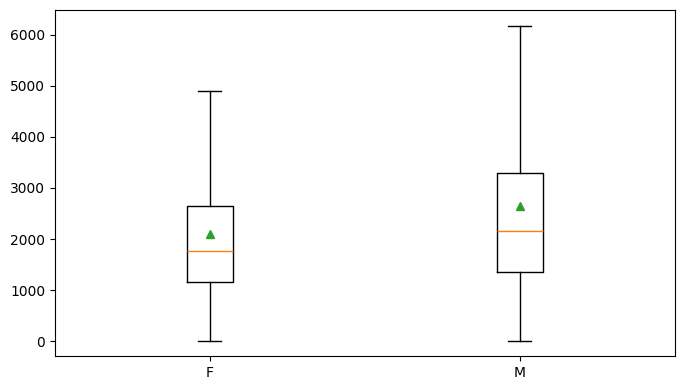

In [17]:
#boxplot  - komanda kuri gali isanalizuoti skaiciu sarasa ir jis nubraizys 
fig, axis = plt.subplots(figsize=[8,4.5])                   # Sukuriama nauja diagrama su atitinkamais matmenimis: plotis 8 coliai ir aukštis 4.5 coliai

axis.boxplot(bduspII, showmeans = True, showfliers=False)   # Atvaizduojama dėžutės diagrama (boxplot) su duomenų masyvu 'bduspII',
                                                            # parodydamas vidurkius (showmeans=True) ir neparodydamas išskirtinių reikšmių (showfliers=False)

axis.set_xticklabels(lytis)                                 # Nustatomi x ašies žymėjimai pagal sąrašą 'lytis', kuriame gali būti lyčių pavadinimai

plt.show()                                                  # Rodo diagramą ekrane


In [8]:
# parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
# Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)


sql="""
select amzius, group_concat(bdu_spalio) from DUS2018N
where lytis = 'F'
group by amzius;
"""
C.execute(sql)
ansI = C.fetchall()
amzius, bduspalF = list(map(list, zip(*ansI)))
#? = np.transpose(ans)
pout(ansI)

| 0 |     14-29      |400,511,915,975,|
| 1 |     30-39      |400,440,1061,178|
| 2 |     40-49      |460,400,400,407,|
| 3 |     50-59      |400,216,505,770,|
| 4 |      60+       |225,663,516,530,|


In [9]:
sql="""
select amzius, group_concat(bdu_spalio) from DUS2018N
where lytis = 'M'
group by amzius;
"""
C.execute(sql)
ansII = C.fetchall()
amzius, bduspalM = list(map(list, zip(*ansII)))
#? = np.transpose(ans)
pout(ansII)

| 0 |     14-29      |1400,480,520,540|
| 1 |     30-39      |1072,2644,2936,4|
| 2 |     40-49      |1500,5265,480,43|
| 3 |     50-59      |1487,1500,400,48|
| 4 |      60+       |457,756,400,671,|


In [10]:
print(bduspalM)
print(bduspalF)

['1400,480,520,540,617,640,489,489,769,900,514,750,905,1206,1320,1120,595,625,625,625,622,622,622,626,759,927,412,451,555,652,653,1100,2396,300,1185,420,420,523,620,628,720,403,1238,522,677,730,702,670,645,643,673,1292,1917,826,868,931,1098,548,633,707,661,865,1192,1185,1324,1399,1616,1945,800,1536,957,1472,2040,2588,2629,3866,440,856,994,1074,1402,1491,784,850,1400,1494,205,606,410,1323,1453,2020,420,420,1000,1000,1000,1100,1100,1200,1300,715,1030,2069,990,1140,1372,1373,1503,1587,1695,1758,1875,2289,2546,263,604,318,700,899,954,1000,1257,1323,1584,1908,2220,2350,889,440,573,1466,760,700,827,501,527,513,519,607,622,677,1842,4074,1735,906,420,500,1325,771,480,749,941,991,985,1547,1143,793,1039,1197,3,366,517,1079,566,935,506,539,905,1975,586,586,775,1149,1711,835,570,255,153,202,420,420,1062,1185,1186,1220,1354,700,1329,1151,1386,1182,1323,1350,1488,1752,455,410,754,421,993,1053,1808,346,1111,400,800,1089,400,574,879,497,764,824,863,1116,790,530,734,401,830,201,405,115,112,1429,604,604

In [12]:
bduspal2 = []
for i in bduspalM:
    skaicia = np.fromstring(i, sep = ',')
    bduspal2.append(skaicia)
print(bduspal2)

bduspal3= []
for i in bduspalF:
    skaicia2 = np.fromstring(i, sep = ',')
    bduspal3.append(skaicia2)
print(bduspal3)

[array([1400.,  480.,  520., ...,  460.,  460., 1990.]), array([1072., 2644., 2936., ..., 1953., 3621.,  462.]), array([1500., 5265.,  480., ...,  650.,  400.,  240.]), array([1487., 1500.,  400., ..., 1000.,  410., 1740.]), array([ 457.,  756.,  400., ..., 3000.,  545.,  400.])]
[array([ 400.,  511.,  915., ...,  470., 1040., 1052.]), array([ 400.,  440., 1061., ..., 1327., 1718.,  402.]), array([460., 400., 400., ..., 429., 448., 507.]), array([ 400.,  216.,  505., ..., 2000.,  400.,   58.]), array([225., 663., 516., ..., 506.,  35., 400.])]


In [179]:
bduspal3= []
for i in bduspalF:
    skaicia2 = np.fromstring(i, sep = ',')
    bduspal3.append(skaicia2)
print(bduspal3)

[array([1400.,  480.,  520., ...,  460.,  460., 1990.]), array([1072., 2644., 2936., ..., 1953., 3621.,  462.]), array([1500., 5265.,  480., ...,  650.,  400.,  240.]), array([1487., 1500.,  400., ..., 1000.,  410., 1740.]), array([ 457.,  756.,  400., ..., 3000.,  545.,  400.])]


In [13]:
print(ansI)  # <- cia sarasas tekstu 
# print(type(bdusp))
len(ans)
type(ans)

[('14-29', '400,511,915,975,1087,1250,400,594,804,1008,1040,1450,818,1460,622,1090,802,500,950,1076,1523,359,586,1402,2554,102,1460,1601,959,451,712,112,419,501,557,643,746,386,940,1061,1200,659,914,484,484,1257,955,1133,1693,415,1757,127,752,775,814,1255,641,936,448,620,389,800,811,880,1115,457,418,255,658,700,700,700,700,899,472,941,958,968,1052,1137,1197,1242,1333,1323,1434,1400,1471,1482,681,946,1135,204,1250,1632,1742,221,634,921,1315,1315,365,604,400,903,1566,800,901,659,772,1171,582,586,776,475,1900,650,559,822,605,1360,105,134,141,141,161,192,271,313,563,230,267,346,722,1004,140,488,328,296,372,549,706,748,754,152,2111,189,315,552,868,876,1184,808,579,665,673,729,315,325,260,328,101,105,115,468,482,544,593,297,1128,253,105,117,575,488,770,420,420,358,923,390,662,410,213,676,758,1175,511,276,732,920,400,689,455,488,502,500,400,987,451,315,770,900,1350,705,668,755,755,755,755,756,523,621,738,500,118,286,555,594,633,743,1044,1870,856,400,818,1496,960,1292,480,562,748,855,500,1034,

NameError: name 'ans' is not defined

In [141]:
bduspal2 = []
for i in bduspalM:
    skaicia = np.fromstring(i, sep = ',')
    bduspal2.append(skaicia)
print(bduspal2)



[array([1400.,  480.,  520., ...,  460.,  460., 1990.]), array([1072., 2644., 2936., ..., 1953., 3621.,  462.]), array([1500., 5265.,  480., ...,  650.,  400.,  240.]), array([1487., 1500.,  400., ..., 1000.,  410., 1740.]), array([ 457.,  756.,  400., ..., 3000.,  545.,  400.])]


In [139]:
bduspal3 = []
for i in bduspalF:
    skaicia = np.fromstring(i, sep = ',')
    bduspal3.append(skaicia)
print(bduspal3)

[array([1400.,  480.,  520., ...,  460.,  460., 1990.]), array([1072., 2644., 2936., ..., 1953., 3621.,  462.]), array([1500., 5265.,  480., ...,  650.,  400.,  240.]), array([1487., 1500.,  400., ..., 1000.,  410., 1740.]), array([ 457.,  756.,  400., ..., 3000.,  545.,  400.])]


In [85]:
ansII_vyrai = []
ansII_moterys = []
amziaus_grupes = []

for lytis, amzius, bduspal in ans:               
    skaiciai = np.fromstring(bduspal, sep=',')   
    if lytis == 'M':
        ansII_vyrai.append(skaiciai)  
    if lytis == 'F':
        ansII_moterys.append(skaiciai)

print(ansII_vyrai)
print(ansII_moterys)

len(ansII_vyrai)
len(ansII_moterys)

[array([1400.,  480.,  520., ...,  460.,  460., 1990.]), array([1072., 2644., 2936., ..., 1953., 3621.,  462.]), array([1500., 5265.,  480., ...,  650.,  400.,  240.]), array([1487., 1500.,  400., ..., 1000.,  410., 1740.]), array([ 457.,  756.,  400., ..., 3000.,  545.,  400.])]
[array([ 400.,  511.,  915., ...,  470., 1040., 1052.]), array([ 400.,  440., 1061., ..., 1327., 1718.,  402.]), array([460., 400., 400., ..., 429., 448., 507.]), array([ 400.,  216.,  505., ..., 2000.,  400.,   58.]), array([225., 663., 516., ..., 506.,  35., 400.])]


5

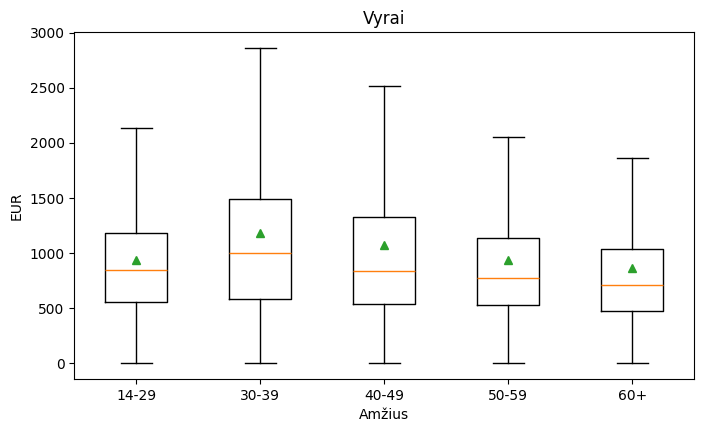

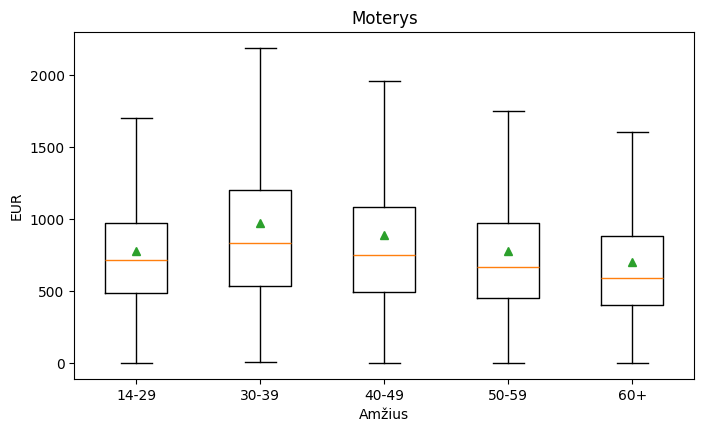

In [24]:
# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(bduspal2, showmeans=True, showfliers=False)
axis.set_title('Vyrai')
axis.set_xlabel('Amžius')
axis.set_ylabel('EUR')
axis.set_xticklabels(amzius)
plt.show()


fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(bduspal3, showmeans=True, showfliers=False)
axis.set_title('Moterys')
axis.set_xlabel('Amžius')
axis.set_ylabel('EUR')
axis.set_xticklabels(amzius)

plt.show()



In [25]:
# 2) Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)

sql="""
SELECT
issilavinimas, group_concat(bdu_spalio) as atlyg   
from DUS2018N
GROUP BY issilavinimas;
"""
C.execute(sql)
atlygI = C.fetchall()
Issilavinimas, atlyg = list(map(list, zip(*atlygI)))
#? = np.transpose(ans)
pout(atlygI)

| 0 |       G1       |555,686,436,455,|
| 1 |       G2       |460,1487,1500,15|
| 2 |       G3       |511,915,975,1087|
| 3 |       G4       |1061,1072,1400,2|


In [26]:
atlygII= []
for i in atlyg:
    skaiciai = np.fromstring(i, sep = ',')
    atlygII.append(skaiciai)
print(atlygII)

[array([555., 686., 436., ..., 585., 933., 480.]), array([ 460., 1487., 1500., ...,  402.,  448.,  507.]), array([ 511.,  915.,  975., ..., 1953., 1990.,  462.]), array([1061., 1072., 1400., ...,  400.,  160., 3621.])]


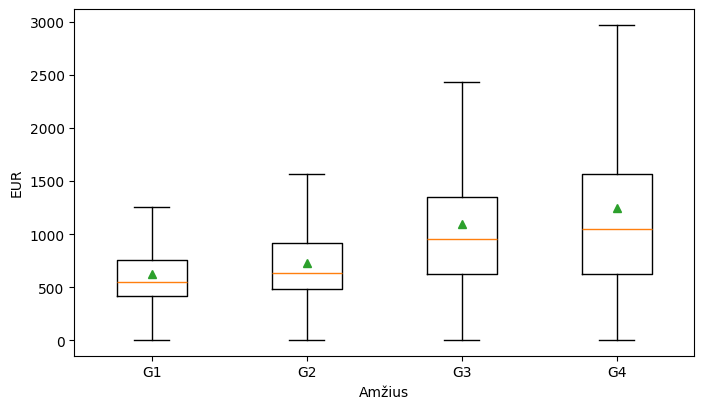

In [29]:
# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(atlygII, showmeans=True, showfliers=False)
axis.set_xlabel('Amžius')
axis.set_ylabel('EUR')
axis.set_xticklabels(Issilavinimas)
plt.show()



In [52]:
# 3) Pateikite su boxplot'u  skelbimų kainų pasiskirtymą top 5 automobilių gamintojams.
# 3) papildymas: suraskite vidutinę kainą visų automobilių ir atvaizduokite brūkšnį ties 
# ta kaina su komanda axis.axhline(y=JŪSŲ RASTAS SKAIČIUS)

sql="""
WITH Top5 AS (
SELECT gamintojas
FROM autopliuslt
GROUP BY gamintojas
ORDER BY COUNT(*) DESC
Limit 5
)
SELECT gamintojas, group_concat(price) from autopliuslt
WHERE gamintojas IN (SELECT gamintojas FROM Top5)
group by gamintojas;
"""
C.execute(sql)
autoI = C.fetchall()
gamintojas, price = list(map(list, zip(*autoI)))
#? = np.transpose(ans)
pout(autoI)

sql="""
SELECT avg(cast(replace(price, " ", "") as float)) from autopliuslt;
"""
C.execute(sql)
vidurk = C.fetchall()
vidurkis = list(map(list, zip(*vidurk)))
#? = np.transpose(ans)
pout(vidurk)





| 0 |      Audi      |1 200,5 500,7 10|
| 1 |      BMW       |19 500,16 190,28|
| 2 | Mercedes-Benz  |42 500,7 500,28 |
| 3 |     Toyota     |11 900,4 250,4 3|
| 4 |   Volkswagen   |16 490,6 500,7 3|
| 0 |   8831.85375   |


In [49]:
autoII= []
for i in price:
    i = i.replace(" ","")
    skaiciai = np.fromstring(i, sep = ',')
    autoII.append(skaiciai)
print(autoII)

[array([ 1200.,  5500.,  7100., 19700.,  9550., 21690., 45800.,  1700.,
        2750.,  3700.,  4150.,  7500.,  8000.,  8450.,  9500., 11000.,
       12500., 14000., 14200., 14300., 14500., 14550., 15900., 16900.,
       23500., 26000., 31500.,   600.,   600.,   700.,   800.,   850.,
         850.,  1050.,  1100.,  1200.,  1200.,  1200.,  1250.,  1350.,
        1350.,  1550.,  1550.,  1600.,  1690.,  1700.,  1850.,  1900.,
        1900.,  2100.,  2200.,  2200.,  2800.,  2800.,  2950.,  3170.,
        3250.,  3300.,  3300.,  3350.,  3400.,  3500.,  3800.,  3999.,
        4000.,  4000.,  4050.,  4100.,  4400.,  4500.,  4800.,  4850.,
        4900.,  5200.,  5200.,  5300.,  5400.,  5650.,  5800.,  6200.,
        6399.,  6400.,  6450.,  6500.,  7190.,  7300.,  7400.,  7500.,
        7800.,  8000.,  8900.,  9350.,  9700.,  9900., 10250.,  1200.,
        5500., 37900., 45800.,  2750.,  3700.,  4000.,  8450.,  9000.,
        9500., 12500., 14000., 14300., 14500., 14500., 16900., 18400.,
     

In [50]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='ggplot')

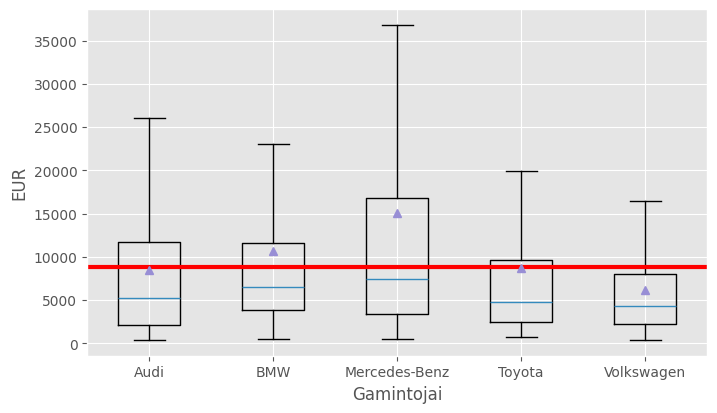

In [55]:
# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(autoII, showmeans=True, showfliers=False)
axis.set_xlabel('Gamintojai')
axis.set_ylabel('EUR')
axis.set_xticklabels(gamintojas)
axis.axhline(y=vidurk, color='red', linewidth=3)
plt.show()



In [61]:
# -- pateikite su bar arba barh vidutines automobilių kainas
# -- top 5 gamintojams, dviem variantais:
# -- a) laikote, kad visi skelbimai yra unikalūs
# -- b) eliminuojate pasikartojančius skelbimus (jei skelbimo id kartojasi DB įrašuose
# -- tai skelbimas nėra unikalus, jis dubliuojasi)

sql="""
WITH Top5 AS (
    SELECT gamintojas
    FROM autopliuslt
    GROUP BY gamintojas
    ORDER BY COUNT(*) DESC
    LIMIT 5 -- Paimame tik 5 populiariausius gamintojus pagal skaičių
)
SELECT gamintojas, 
       AVG(CAST(REPLACE(price, ' ', '') AS FLOAT)) as average 
FROM autopliuslt
WHERE gamintojas IN (SELECT gamintojas FROM Top5) 
GROUP BY gamintojas; 
"""
C.execute(sql)
vidkain = C.fetchall()
gamintojas, price = list(map(list, zip(*vidkain)))
#? = np.transpose(ans)
pout(vidkain)
type(vidkain)


| 0 |      Audi      |8447.66519823788|
| 1 |      BMW       |10652.1369863013|
| 2 | Mercedes-Benz  |15080.2768361581|
| 3 |     Toyota     |8712.73376623376|
| 4 |   Volkswagen   |6190.71290322580|


list

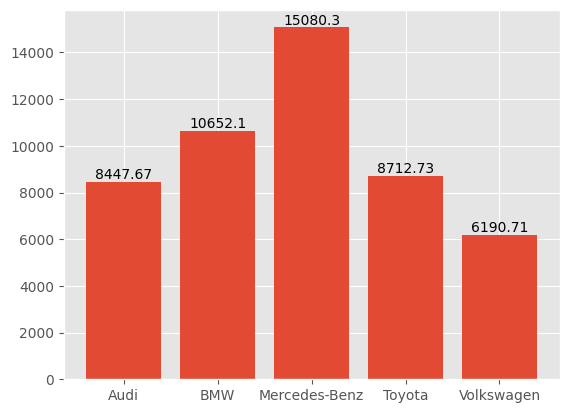

In [63]:
fig, axis = plt.subplots()
barai = axis.bar(gamintojas, price)
axis.bar_label(barai)
plt.show()

In [ ]:
# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)



















